<a href="https://colab.research.google.com/github/ruslanmv/BeeAI-Framework-Orchestration-and-Multi-Agent-Systems/blob/main/Nodex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from scipy.stats import gaussian_kde
import networkx as nx
import matplotlib.pyplot as plt

# ---------------- Synthetic Acme Corp Security Data Generation ----------------
np.random.seed(42)
countries = ['USA', 'Canada', 'UK', 'Germany', 'France', 'Japan', 'Australia', 'Singapore', 'Brazil', 'India', 'South Korea', 'Netherlands', 'Switzerland', 'Sweden']
locations = ['New York', 'Toronto', 'London', 'Frankfurt', 'Paris', 'Tokyo', 'Sydney', 'Singapore', 'Sao Paulo', 'Mumbai', 'Seoul', 'Amsterdam', 'Zurich', 'Stockholm', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia']
asset_types = ['Workstation', 'Server', 'Mobile Device', 'Network Device', 'Cloud Instance', 'IoT Device', 'Virtual Machine', 'Database Server', 'Application Server', 'Storage Array']
criticality_levels = ['Critical', 'High', 'Medium', 'Low']
isps = ['ISP_Alpha', 'ISP_Beta', 'ISP_Gamma', 'CloudNet', 'SecureCloud', 'GlobalCom', 'NetSphere', 'ApexNet', 'DataStream', 'InfiNet']
data_classes = ['Public', 'Internal', 'Confidential', 'Secret', 'Restricted']
network_zones = ['DMZ', 'Internal Network', 'External Network', 'Guest Network', 'Production Zone', 'Development Zone', 'Testing Zone', 'Management Network']
operating_systems = ['Windows', 'Linux', 'macOS', 'Android', 'iOS', 'ChromeOS', 'UnknownOS']
software_types = ['Office Suite', 'Web Browser', 'Database', 'Security Software', 'Development Tools', 'System Utilities', 'Custom Application', 'Cloud Service Client']
departments = ['Sales', 'Marketing', 'Engineering', 'Finance', 'HR', 'IT', 'Operations', 'Legal', 'R&D']
compliance_statuses = ['Compliant', 'Non-Compliant', 'Pending Review', 'Exempt']
vulnerability_severities = ['Critical', 'High', 'Medium', 'Low', 'Info']
threat_actors = ['Nation-State', 'Cybercriminal', 'Hacktivist', 'Insider', 'Competitor', 'Unknown']
attack_vectors = ['Phishing', 'Malware', 'Exploit', 'Brute Force', 'Social Engineering', 'Insider Access', 'Supply Chain']
event_categories = ['Security Incident', 'System Anomaly', 'Policy Violation', 'Performance Issue', 'Configuration Change', 'Access Violation', 'Data Leakage']


def generate_asset():
    base_ip = f"{np.random.randint(1,250)}.{np.random.randint(0,255)}.{np.random.randint(0,255)}.0"
    return {
        "ip_range": f"{base_ip}/{np.random.choice([24, 24, 24, 16, 8, 32])}",
        "isp": np.random.choice(isps),
        "country": np.random.choice(countries),
        "location": np.random.choice(locations),
        "asset_type": np.random.choice(asset_types, p=[0.2, 0.2, 0.15, 0.15, 0.1, 0.08, 0.05, 0.03, 0.02, 0.02]), # Adjusted probabilities
        "criticality": np.random.choice(criticality_levels, p=[0.15, 0.3, 0.35, 0.2]), # Adjusted probabilities
        "last_activity": (datetime.now() - timedelta(days=np.random.randint(0,60))).strftime('%Y-%m-%d'), # Increased range
        "vulnerabilities": np.random.randint(0,10), # Increased range
        "data_classification": np.random.choice(data_classes, p=[0.3, 0.3, 0.2, 0.15, 0.05]), # Adjusted probabilities
        "network_zone": np.random.choice(network_zones),
        "connected_assets": np.random.randint(0, 100), # Increased range
        "notes": "",
        "operating_system": np.random.choice(operating_systems, p=[0.4, 0.3, 0.1, 0.05, 0.05, 0.05, 0.05]), # Added OS
        "installed_software": np.random.choice(software_types, size=np.random.randint(1, 4), replace=False).tolist(), # Added software list
        "department": np.random.choice(departments, p=[0.2, 0.15, 0.25, 0.1, 0.08, 0.07, 0.05, 0.05, 0.05]), # Added Department
        "compliance_status": np.random.choice(compliance_statuses, p=[0.5, 0.1, 0.2, 0.2]) # Added compliance
    }

# Generate the primary asset data
asset_data = [generate_asset() for _ in range(50)] # Increased number of assets


df_asset_kb = pd.DataFrame(asset_data)

# ---------------- Generate Security Event Data ----------------
random.seed(42)
start_date = datetime(2023, 1, 1) # Recent date range for demo
end_date  = datetime(2024, 4, 1)
n_points = 500 # Increased number of events

event_types = [
    ("Phishing Email Detected", 0.3),
    ("Malware Infection",      0.25),
    ("Suspicious Login Activity", 0.2),
    ("Vulnerability Exploitation Attempt", 0.15),
    ("Data Exfiltration Attempt", 0.1),
]

def choose_event_label():
    r = random.random()
    cumulative = 0
    for label, freq in event_types:
        cumulative += freq
        if r <= cumulative:
            return label
    return event_types[-1][0]

In [8]:
dates = []
for month in range(1, 14): # ~ 13 months from Jan 2023 to Feb 2024
    monthly_points = int(n_points / 13) # Evenly distributed events
    # Correcting the month and year logic:
    year = 2023
    month_val = month
    if month > 12:
        year = 2024
        month_val = month % 12  # Get the correct month for 2024
        if month_val == 0: #Handle December rollover
            month_val=12
    month_start = datetime(year, month_val, 1)
    if month < 13:
        if month == 12:
            month_end = datetime(2024, 1, 1)
        else:
            month_end = datetime(2023, month + 1, 1)
    else:
        month_end = end_date

    delta_days = (month_end - month_start).days
    for _ in range(monthly_points):
        random_days = random.randint(0, max(delta_days - 1, 0))
        dates.append(month_start + timedelta(days=random_days))

Acme Corp synthetic data saved to CSV files: acme_corp_asset_kb.csv, acme_corp_security_events.csv, acme_corp_relations.csv


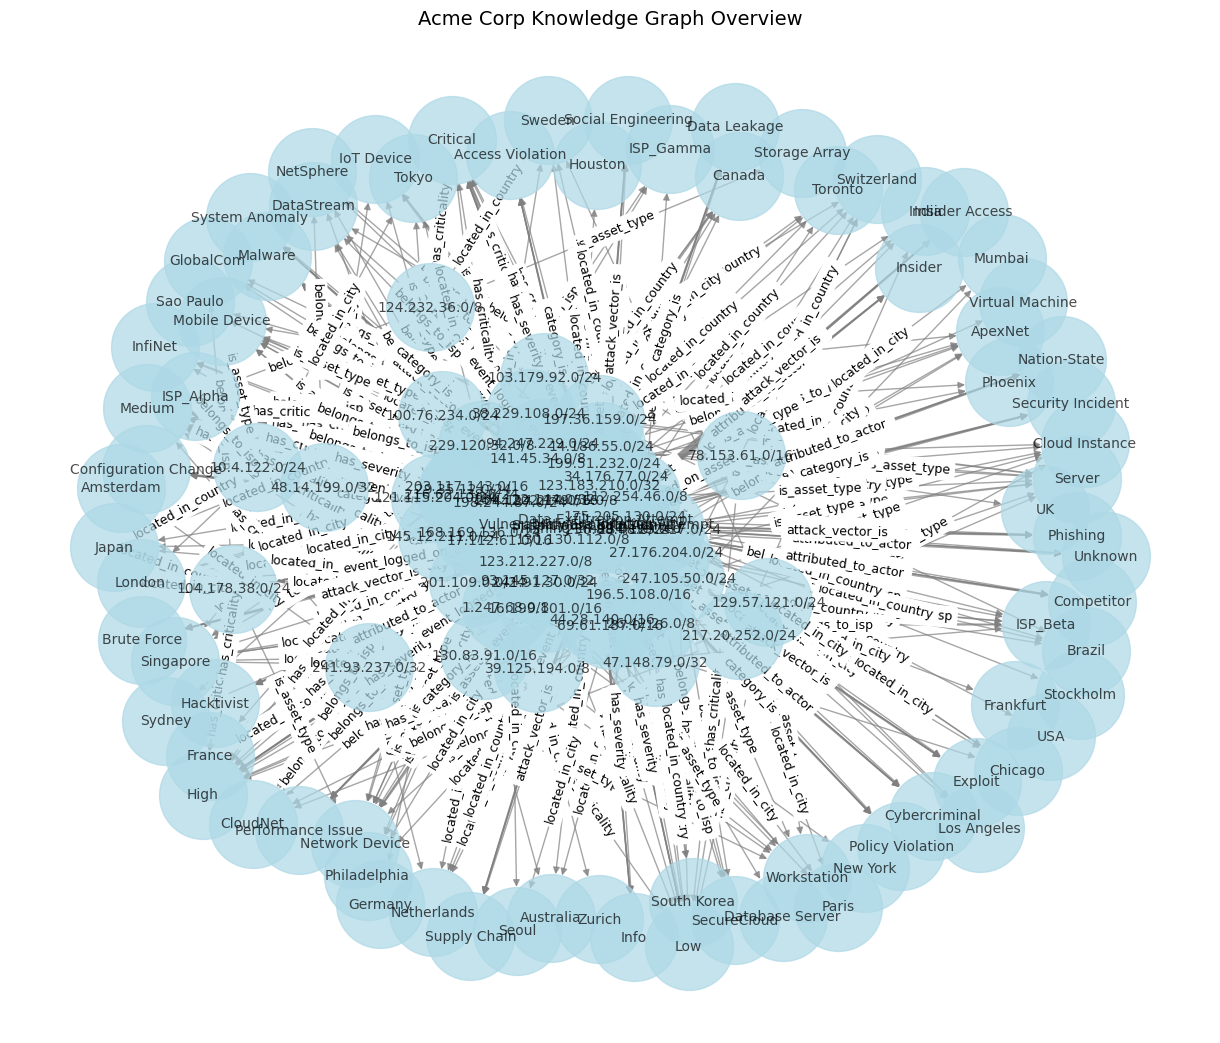

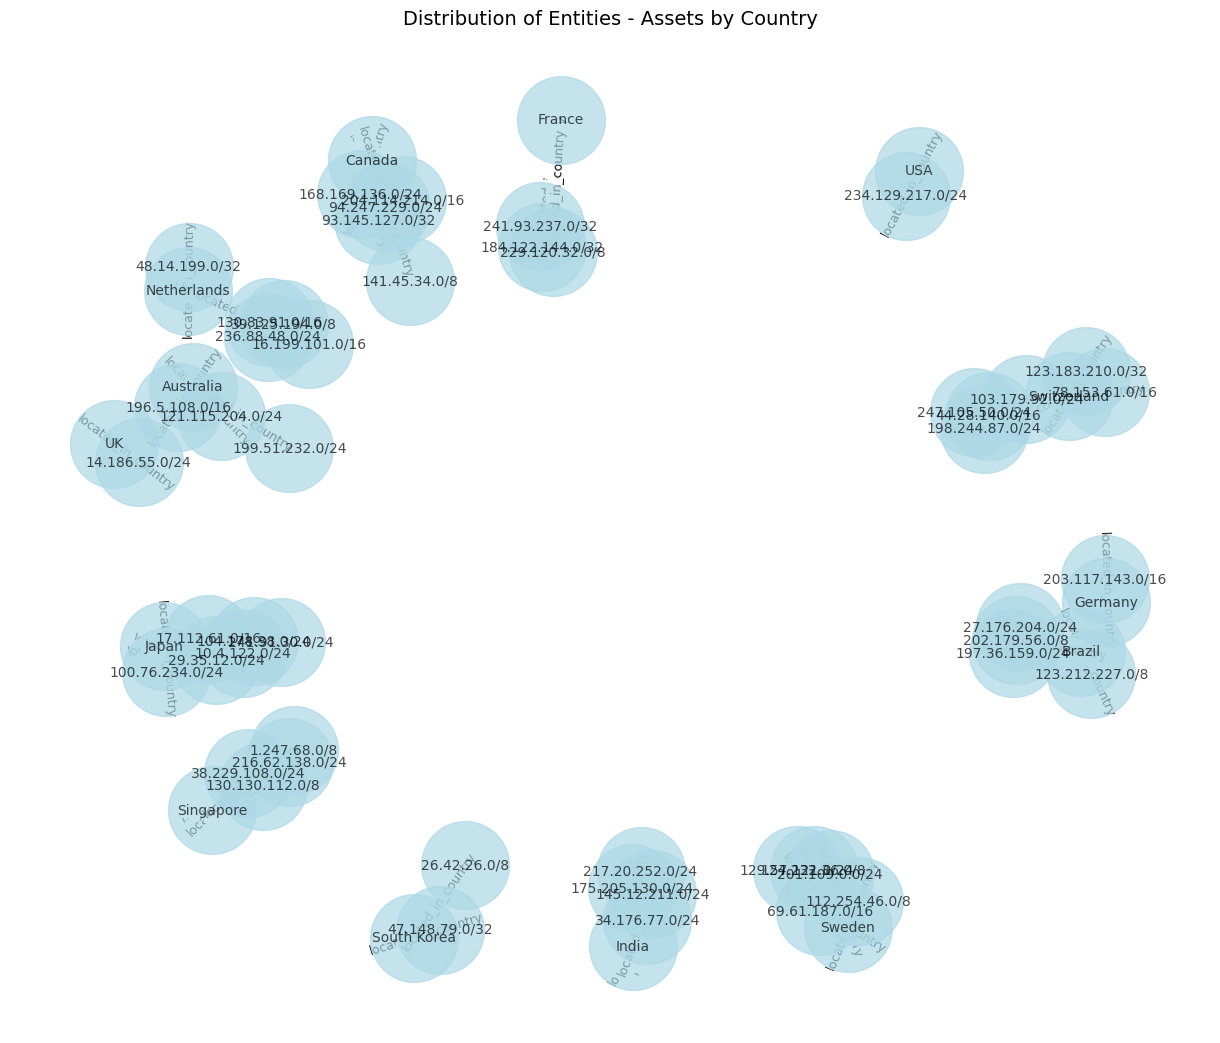

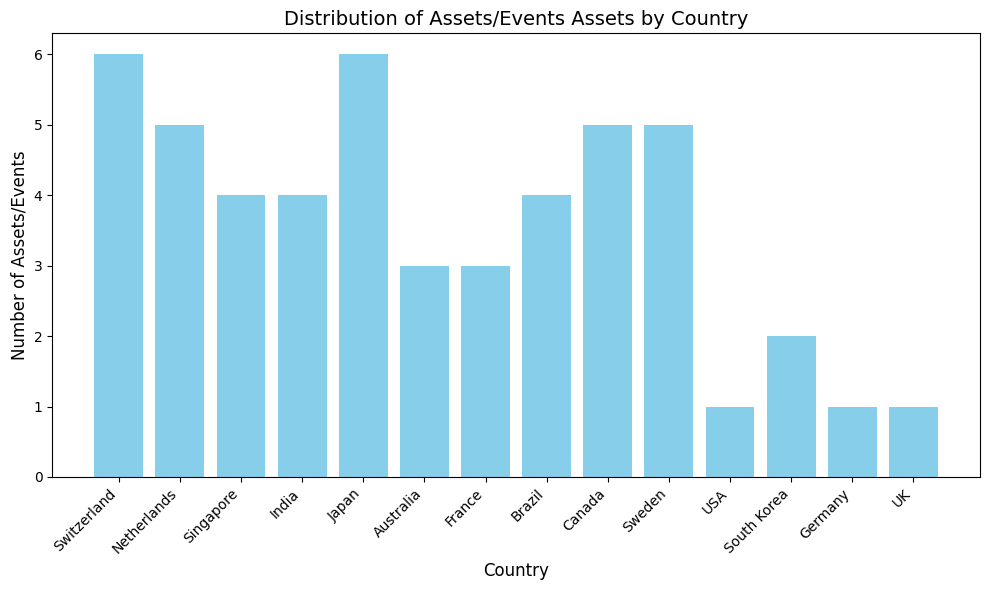

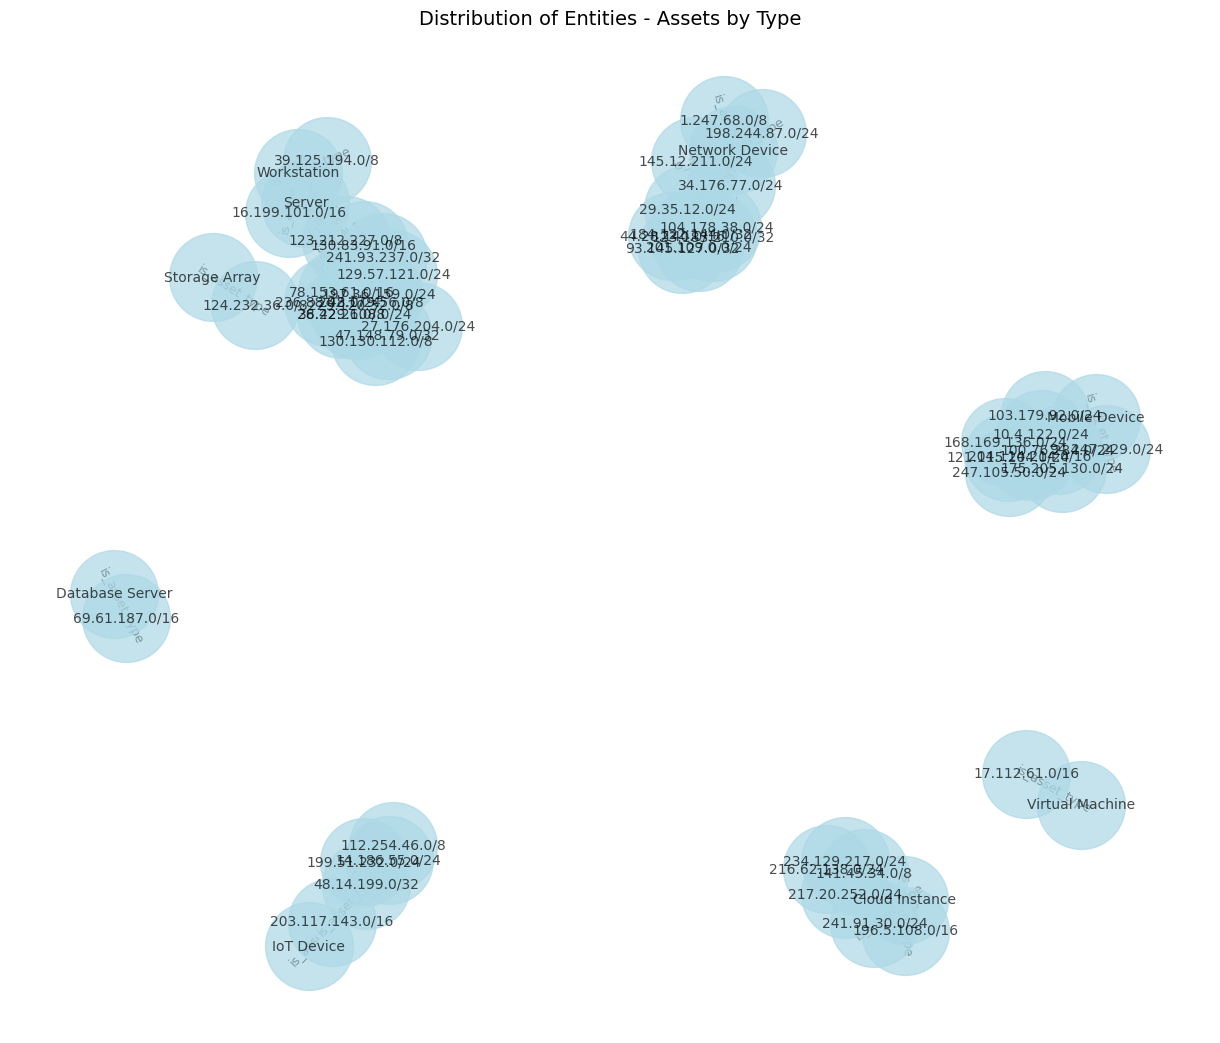

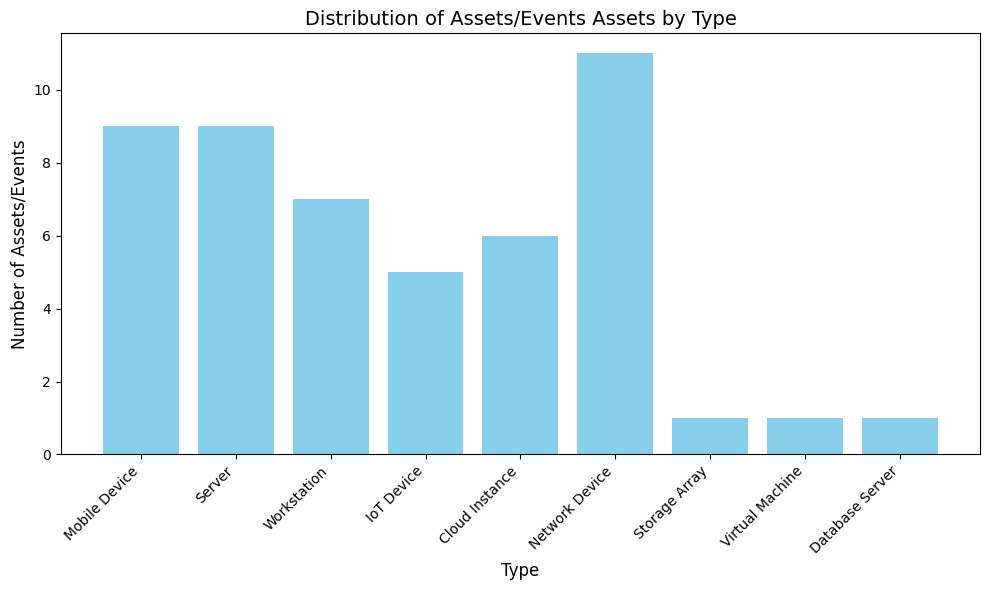

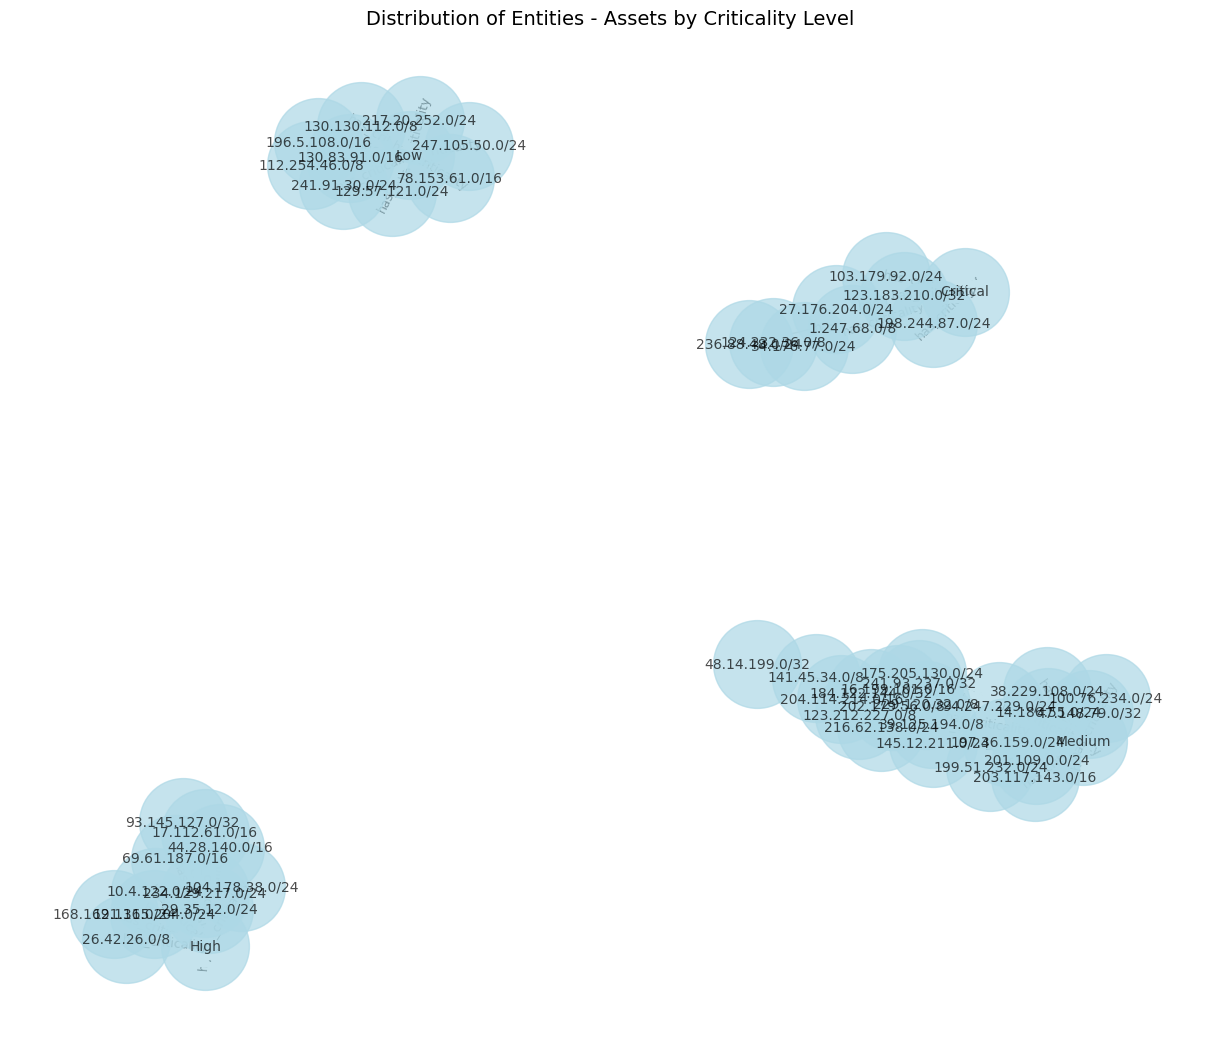

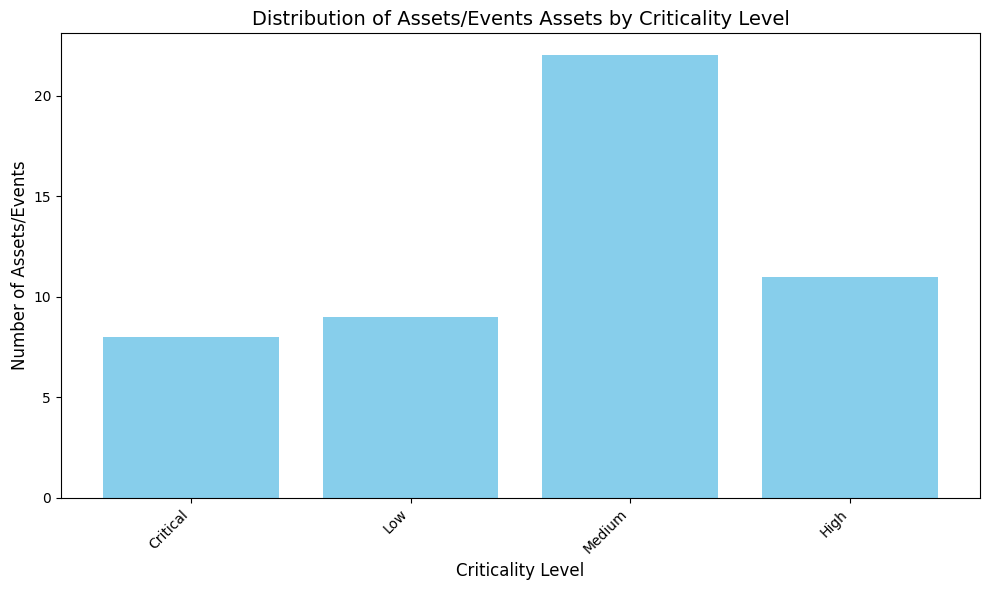

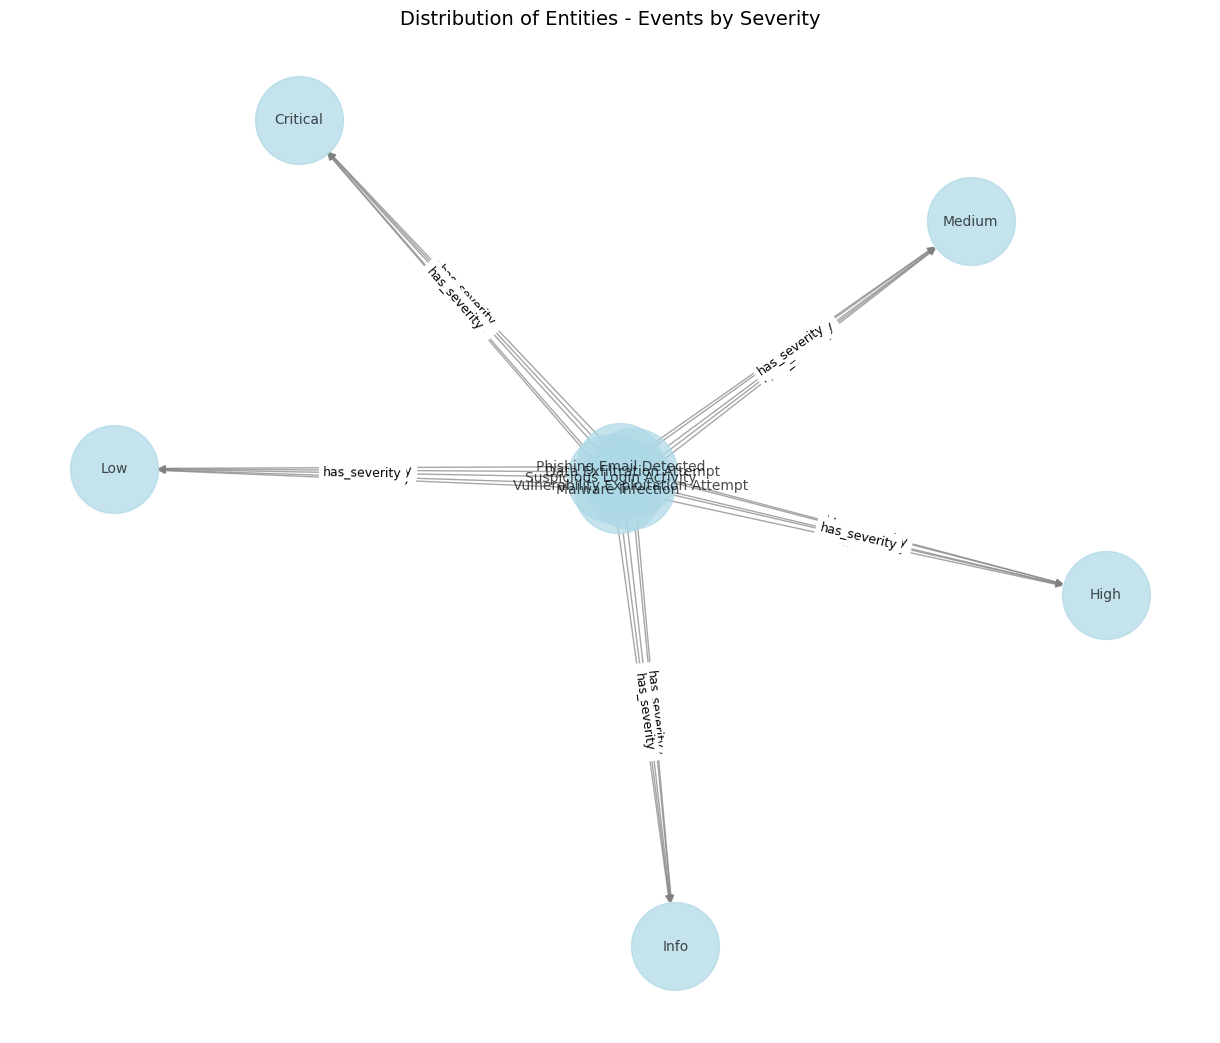

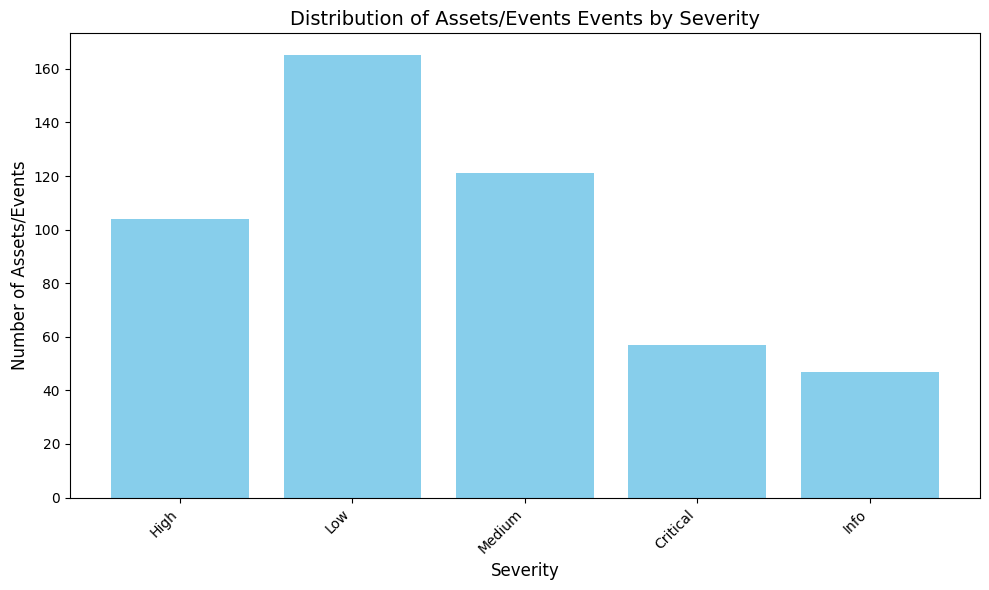

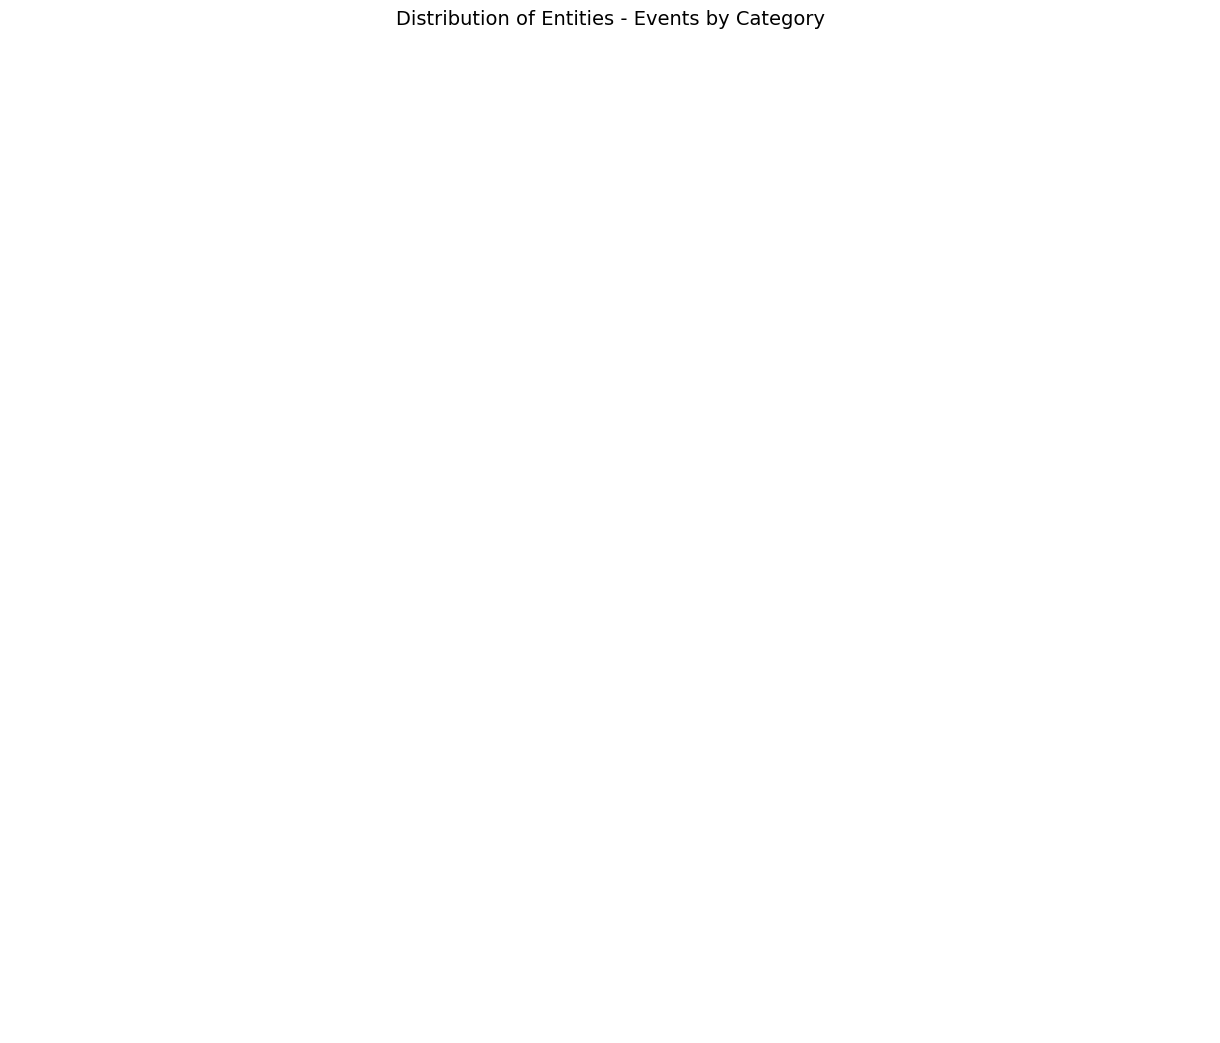

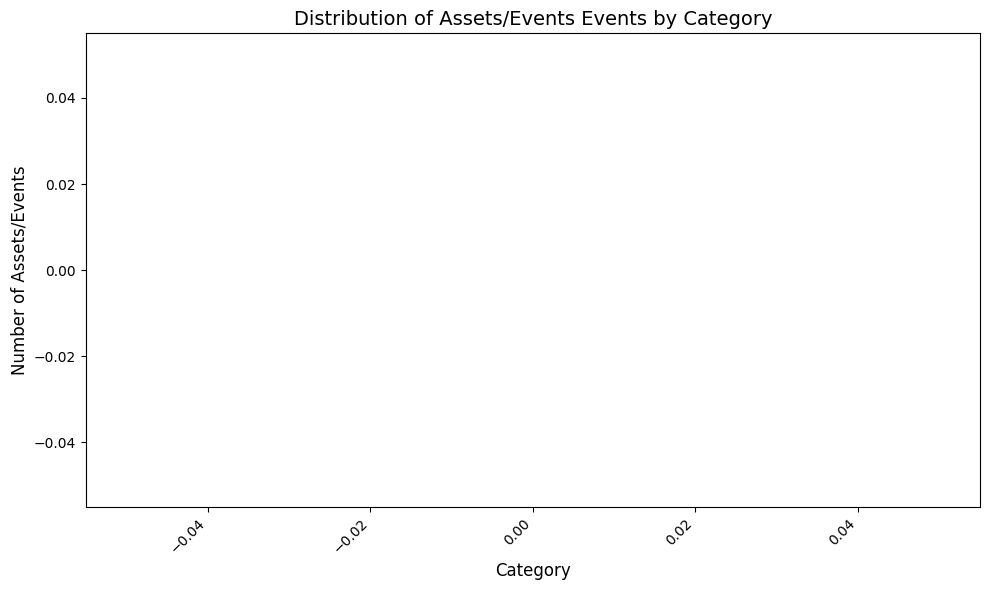

In [9]:
labels_event = [choose_event_label() for _ in range(len(dates))]
severities = [np.random.choice(vulnerability_severities, p=[0.1, 0.2, 0.3, 0.3, 0.1]) for _ in range(len(dates))] # Added severities
threat_actors_events = [np.random.choice(threat_actors, p=[0.1, 0.4, 0.1, 0.2, 0.1, 0.1]) for _ in range(len(dates))] # Added threat actors
attack_vectors_events = [np.random.choice(attack_vectors, p=[0.3, 0.3, 0.15, 0.05, 0.1, 0.05, 0.05]) for _ in range(len(dates))] # Added attack vectors
event_categories_events = [np.random.choice(event_categories, p=[0.3, 0.2, 0.15, 0.1, 0.1, 0.08, 0.07]) for _ in range(len(dates))] # Added event categories


df_security_events = pd.DataFrame({
    "event_timestamp": dates,
    "event_type": labels_event,
    "event_severity": severities,
    "threat_actor": threat_actors_events,
    "attack_vector": attack_vectors_events,
    "event_category": event_categories_events
})

df_security_events["DateOrdinal"] = df_security_events["event_timestamp"].map(datetime.toordinal)
date_ordinals = df_security_events["DateOrdinal"].values
kde = gaussian_kde(date_ordinals, bw_method=0.5)
x_range = np.linspace(start_date.toordinal(), datetime(2024, 5, 1).toordinal(), 500) # Extended x_range slightly
kde_values = kde(x_range)
max_density = kde_values.max()

density = []
for date_val in df_security_events["DateOrdinal"]:
    idx = np.searchsorted(x_range, date_val)
    if idx <= 0:
        local_density = kde_values[0]
    elif idx >= len(kde_values):
        local_density = kde_values[-1]
    else:
        local_density = kde_values[idx]
    offset = random.uniform(-0.1, 0.1) * (max_density / 3.0)
    density.append(max(0, local_density + offset))
df_security_events["event_density"] = density

# Function to randomly associate events with assets
def associate_event_with_asset(row):
    asset = df_asset_kb.sample(1).iloc[0] # Pick a random asset
    row["asset_ip_range"] = asset["ip_range"]
    row["asset_isp"] = asset["isp"]
    row["asset_country"] = asset["country"]
    row["asset_location"] = asset["location"]
    row["asset_type"] = asset["asset_type"]
    row["asset_criticality"] = asset["criticality"]
    return row

df_security_events = df_security_events.apply(associate_event_with_asset, axis=1)


# ---------------- Combine Data and Create Relations ----------------

# Combine asset and event data (optional, depending on analysis needs)
df_combined_kb = pd.merge(df_asset_kb, df_security_events, left_on='ip_range', right_on='asset_ip_range', how='outer')


# Generate relation data for graph database
database_with_relations = []

# Asset Belongs to ISP Relation
for index, row in df_asset_kb.iterrows():
    database_with_relations.append({
        "source": row["ip_range"],
        "target": row["isp"],
        "relation": "belongs_to_isp"
    })

# Asset Located in Country Relation
for index, row in df_asset_kb.iterrows():
    database_with_relations.append({
        "source": row["ip_range"],
        "target": row["country"],
        "relation": "located_in_country"
    })

# Asset Located in Location Relation
for index, row in df_asset_kb.iterrows():
    database_with_relations.append({
        "source": row["ip_range"],
        "target": row["location"],
        "relation": "located_in_city"
    })

# Asset is of Asset Type Relation
for index, row in df_asset_kb.iterrows():
    database_with_relations.append({
        "source": row["ip_range"],
        "target": row["asset_type"],
        "relation": "is_asset_type"
    })

# Asset has Criticality Relation
for index, row in df_asset_kb.iterrows():
    database_with_relations.append({
        "source": row["ip_range"],
        "target": row["criticality"],
        "relation": "has_criticality"
    })

# Event Logged against Asset Relation
for index, row in df_security_events.iterrows():
    database_with_relations.append({
        "source": row["event_type"], # Using event type as node for demo, could be event ID if needed
        "target": row["asset_ip_range"],
        "relation": "event_logged_on_asset"
    })
    database_with_relations.append({
        "source": row["event_type"],
        "target": row["event_severity"],
        "relation": "has_severity"
    })
    database_with_relations.append({
        "source": row["event_type"],
        "target": row["threat_actor"],
        "relation": "attributed_to_actor"
    })
    database_with_relations.append({
        "source": row["event_type"],
        "target": row["attack_vector"],
        "relation": "attack_vector_is"
    })
    database_with_relations.append({
        "source": row["event_type"],
        "target": row["event_category"],
        "relation": "category_is"
    })


# ---------------- Fill Missing & Format Data in df_asset_kb (already handled by design, no NaNs) ----------------

# Save the knowledge base data to CSV files
df_asset_kb.to_csv('acme_corp_asset_kb.csv', index=False)
df_security_events.to_csv('acme_corp_security_events.csv', index=False)
pd.DataFrame(database_with_relations).to_csv('acme_corp_relations.csv', index=False) # Save relations to CSV

print("Acme Corp synthetic data saved to CSV files: acme_corp_asset_kb.csv, acme_corp_security_events.csv, acme_corp_relations.csv")

# ---------------- Graph Visualization Functions (reusing and demonstrating with new data) ----------------

# Function to construct graph from database
def build_graph(database):
    G = nx.DiGraph()
    for entry in database:
        G.add_edge(entry["source"], entry["target"], relation=entry["relation"])
    return G

# Visualize function
def visualize_graph(graph, title="Knowledge Graph Visualization"):
    plt.figure(figsize=(12, 10)) # Increased figure size
    pos = nx.spring_layout(graph, seed=42)  # Consistent layout
    labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=4000, font_size=10, alpha=0.7) # Adjusted node size, font size, alpha
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_size=9) # Adjusted font size
    plt.title(title, fontsize=14) # Added title
    plt.show()

# Build graph from relations data
G_kb = build_graph(database_with_relations)

# Visualize the entire knowledge graph
visualize_graph(G_kb, title="Acme Corp Knowledge Graph Overview")


# --- Example of Subgraph and Node Distribution ---

def visualize_node_distribution(database, relation_type, title_suffix):
    filtered_relations = [entry for entry in database if entry["relation"] == relation_type]
    subgraph = build_graph(filtered_relations)
    visualize_graph(subgraph, title=f"Distribution of Entities - {title_suffix}")

    node_counts = {}
    for entry in filtered_relations:
        target_node = entry["target"]
        node_counts[target_node] = node_counts.get(target_node, 0) + 1

    plt.figure(figsize=(10, 6))
    plt.bar(node_counts.keys(), node_counts.values(), color='skyblue')
    plt.xlabel(title_suffix.split("by")[-1].strip(), fontsize=12) # Dynamic X-label
    plt.ylabel("Number of Assets/Events", fontsize=12)
    plt.title(f"Distribution of Assets/Events {title_suffix}", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Example distributions:
visualize_node_distribution(database_with_relations, "located_in_country", "Assets by Country")
visualize_node_distribution(database_with_relations, "is_asset_type", "Assets by Type")
visualize_node_distribution(database_with_relations, "has_criticality", "Assets by Criticality Level")
visualize_node_distribution(database_with_relations, "has_severity", "Events by Severity")
visualize_node_distribution(database_with_relations, "event_category_is", "Events by Category")

Acme Corp synthetic data saved to CSV files: acme_corp_asset_kb.csv, acme_corp_security_events.csv, acme_corp_relations.csv


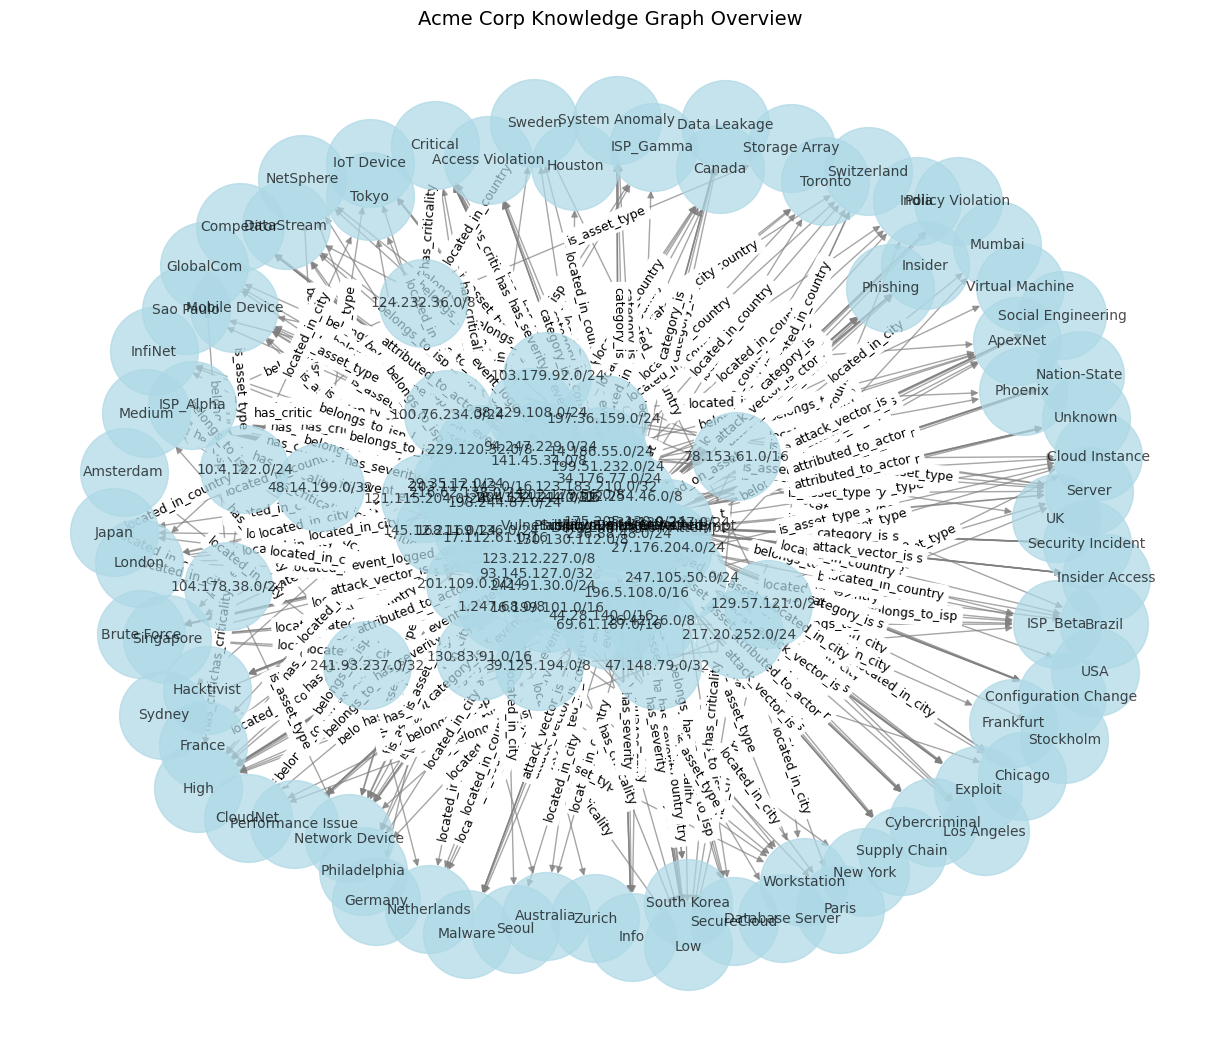

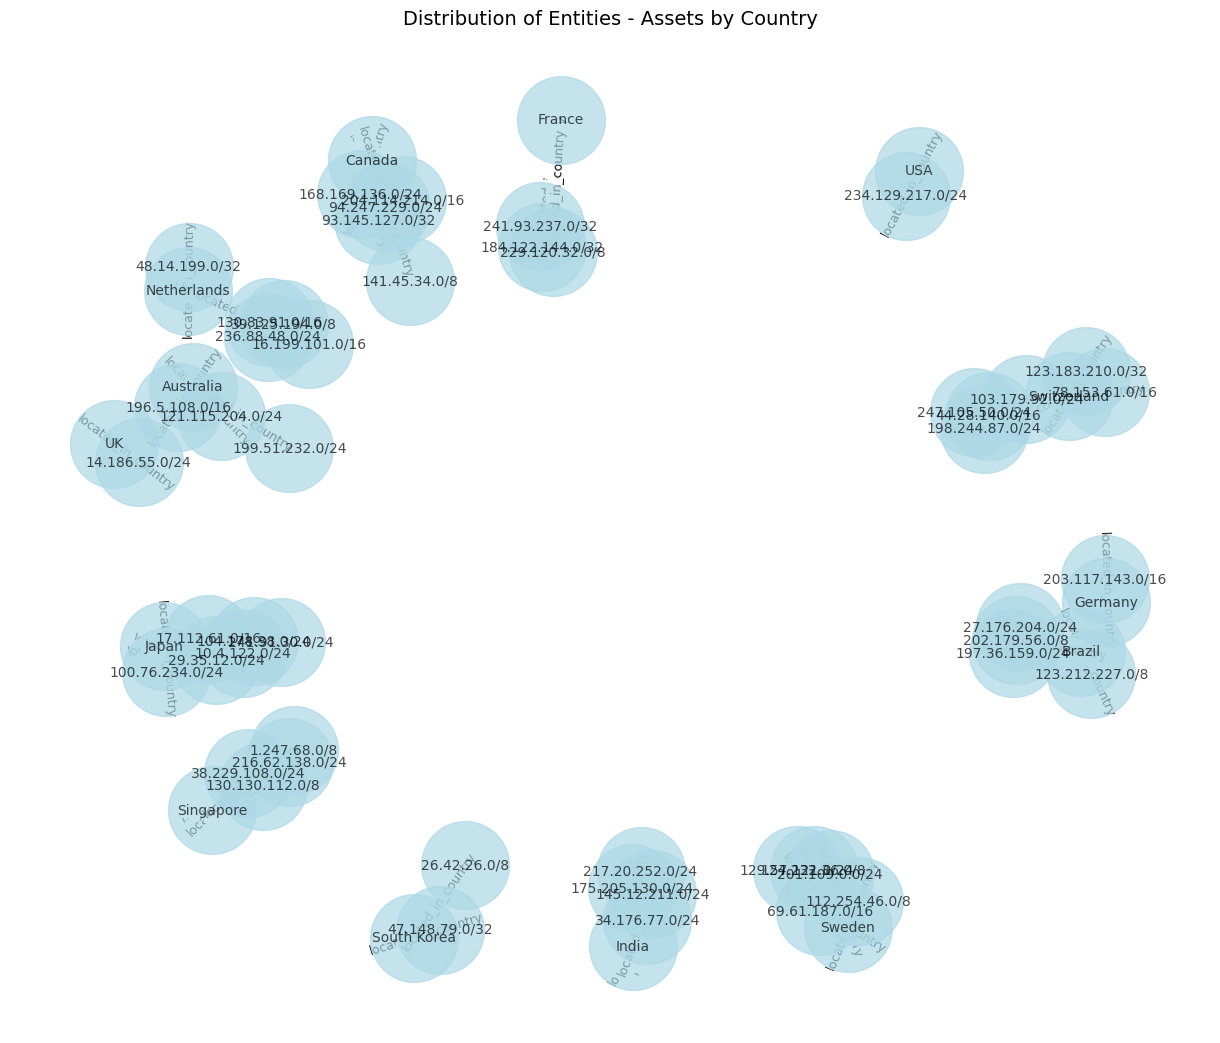

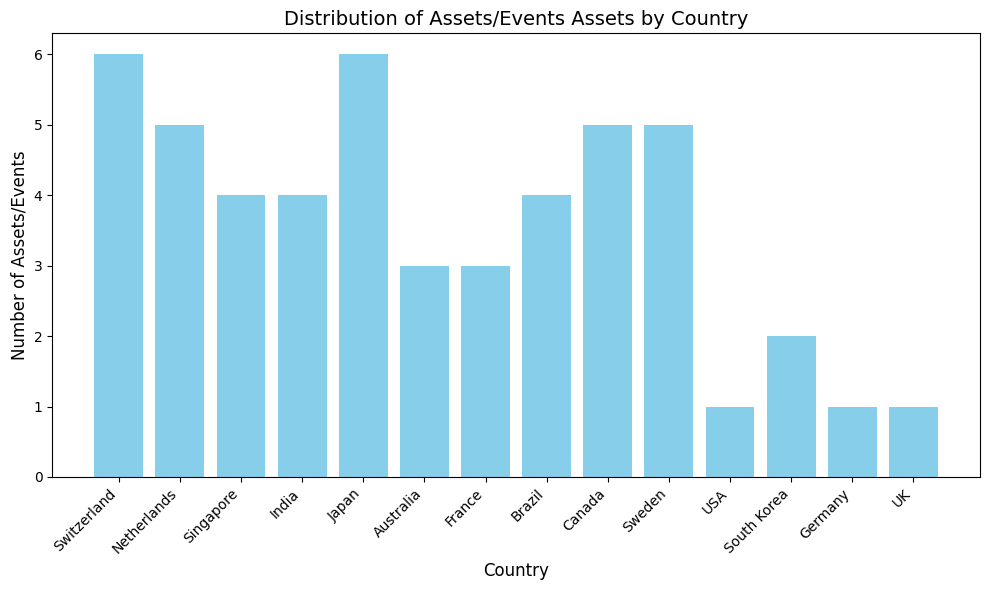

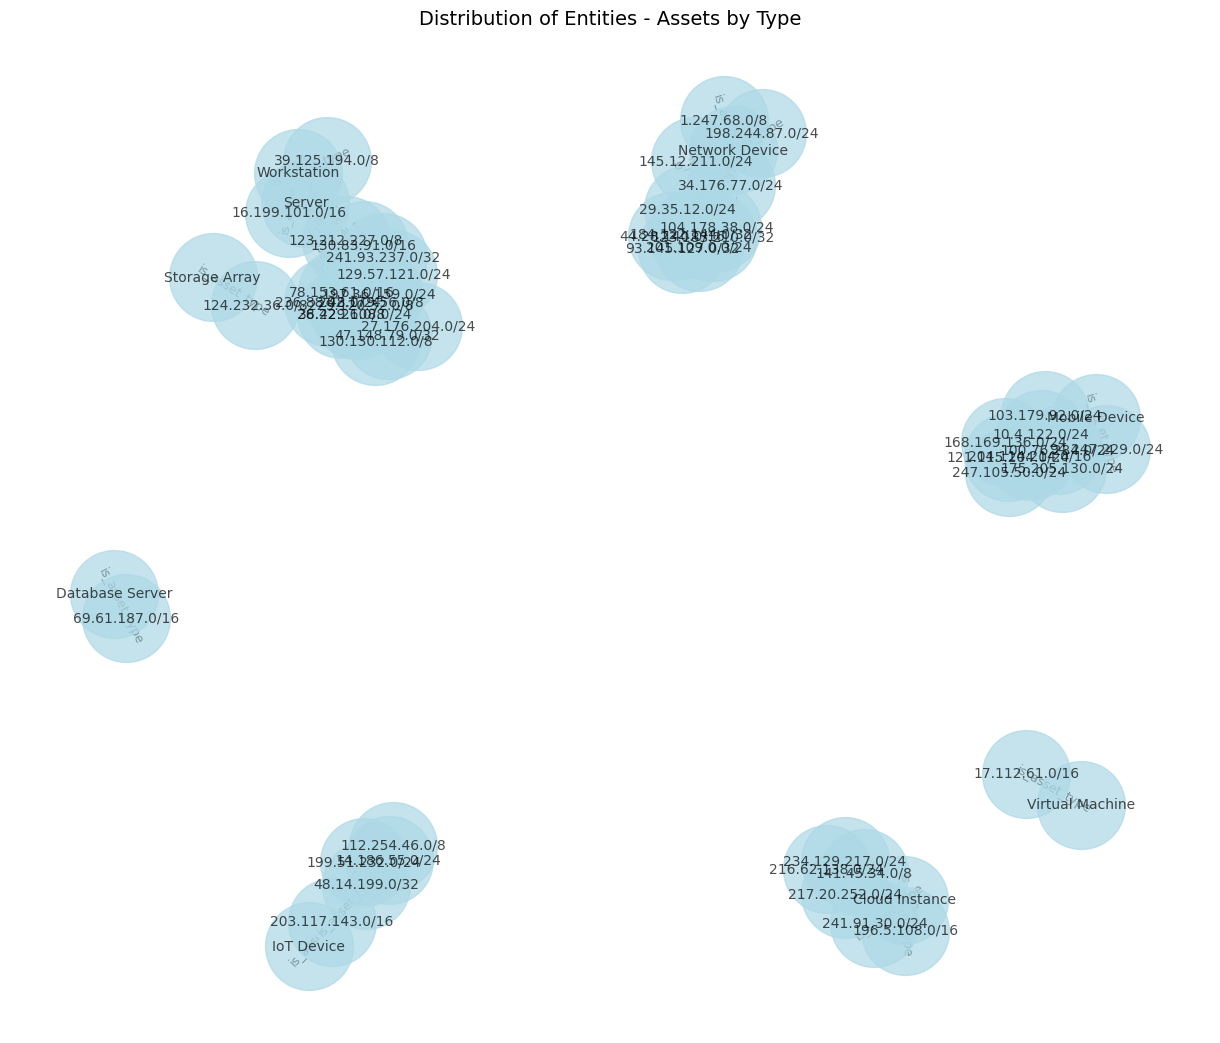

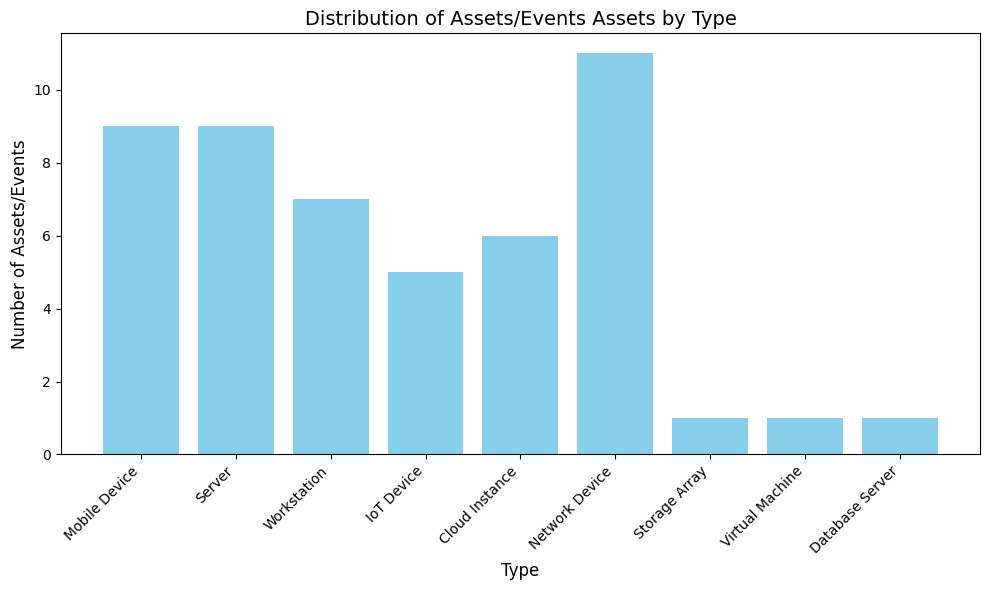

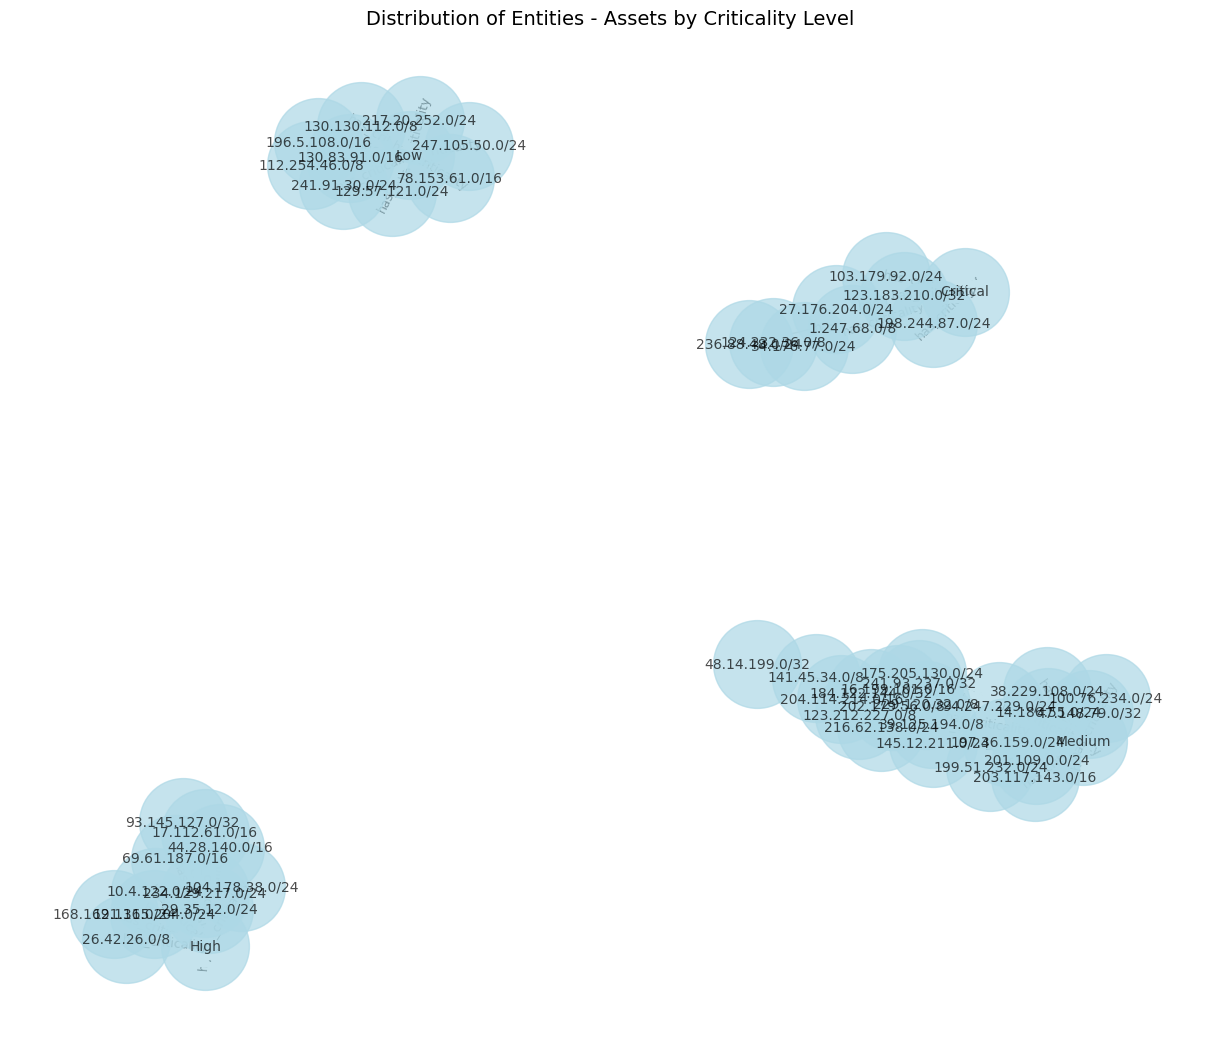

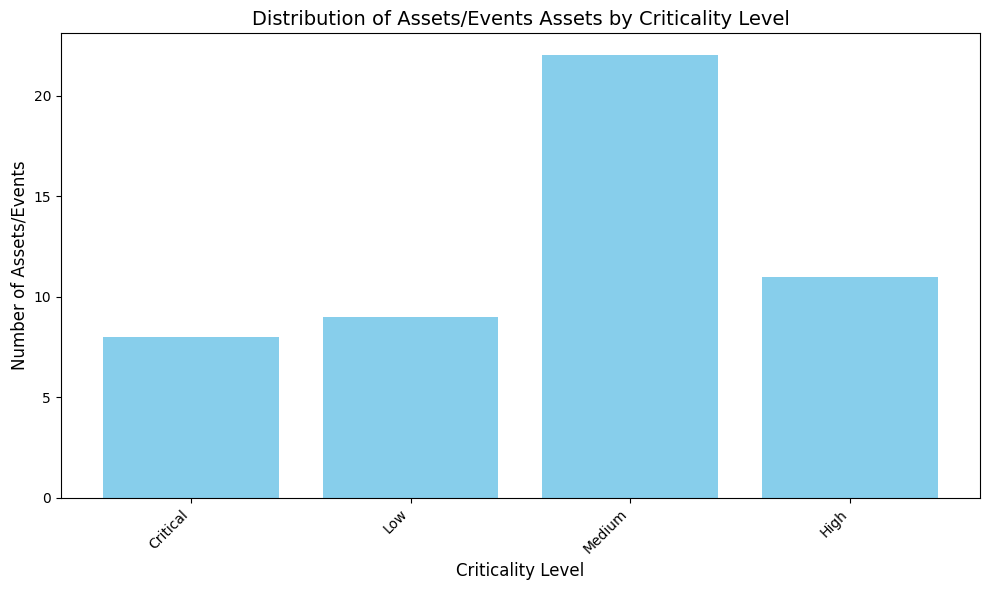

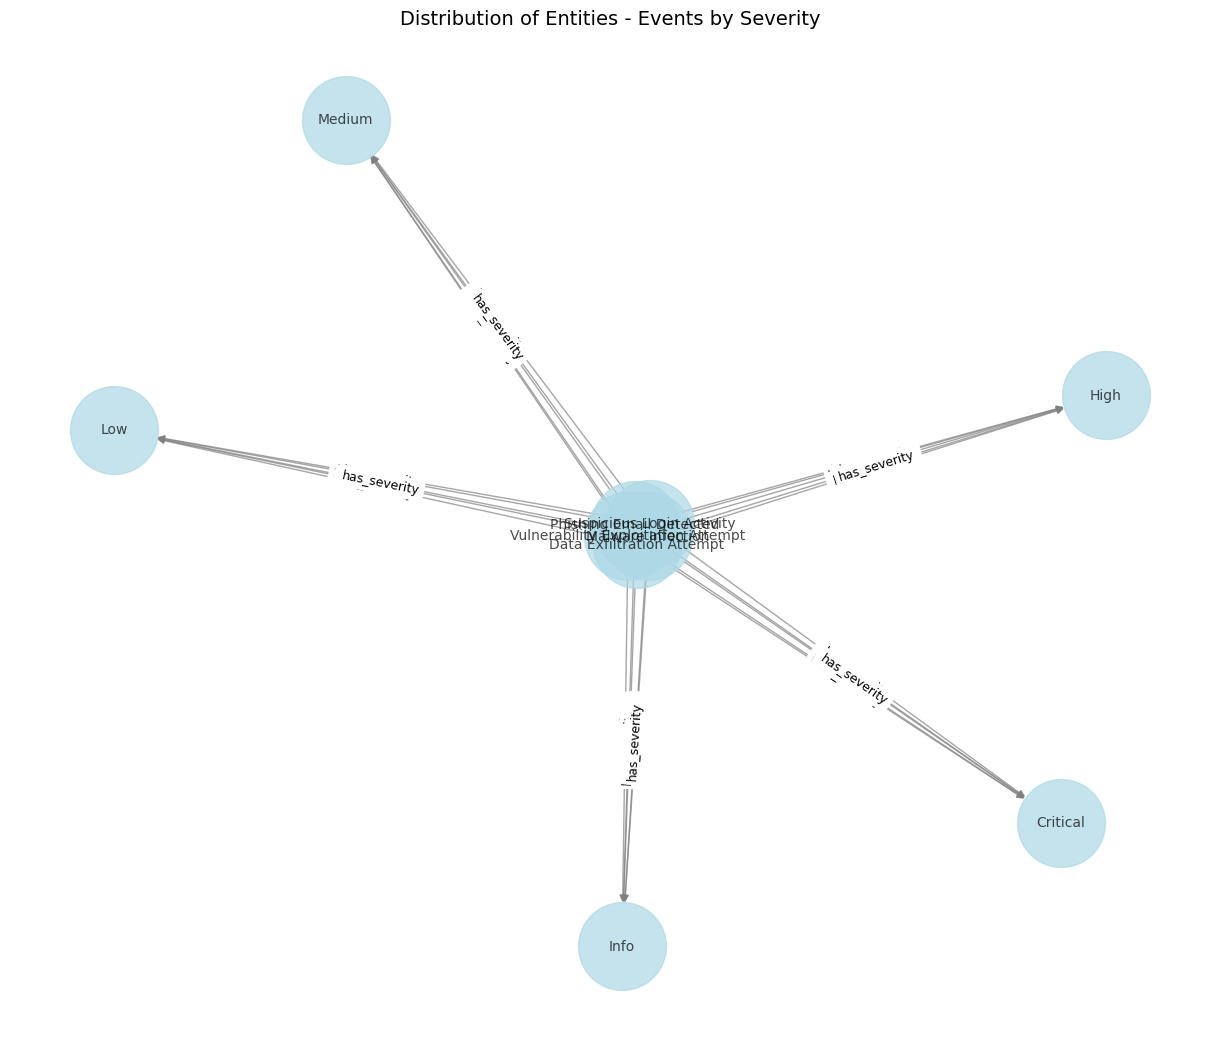

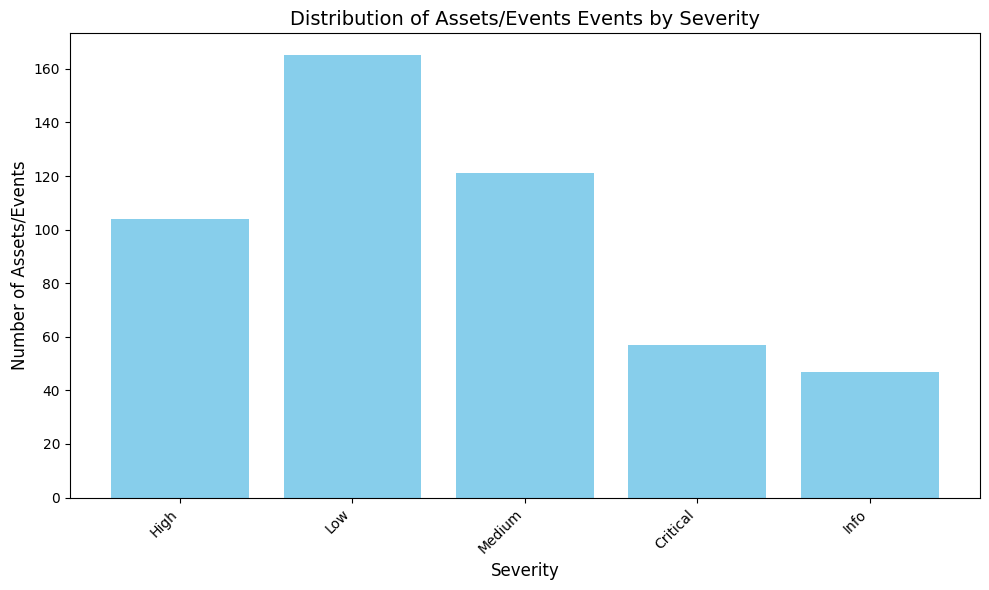

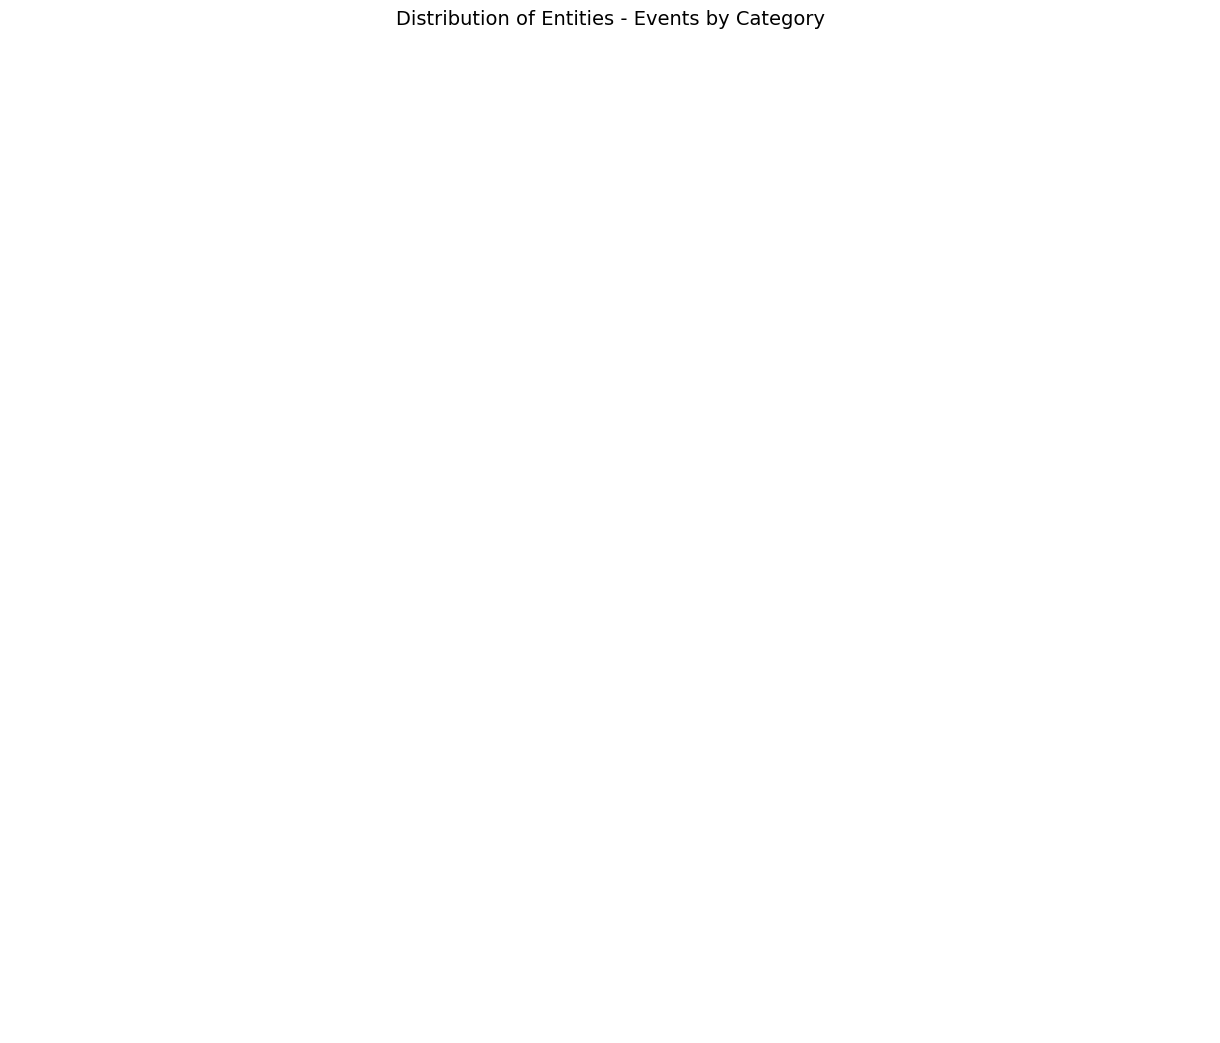

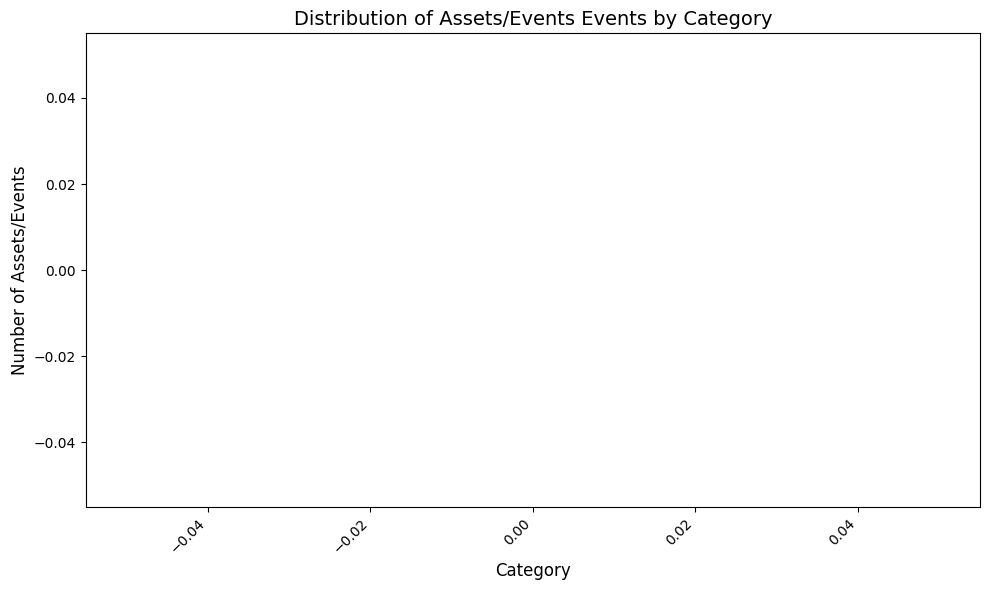

In [15]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from scipy.stats import gaussian_kde
import networkx as nx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# ---------------- Synthetic Acme Corp Security Data Generation ----------------
np.random.seed(42)
countries = ['USA', 'Canada', 'UK', 'Germany', 'France', 'Japan', 'Australia', 'Singapore', 'Brazil', 'India', 'South Korea', 'Netherlands', 'Switzerland', 'Sweden']
locations = ['New York', 'Toronto', 'London', 'Frankfurt', 'Paris', 'Tokyo', 'Sydney', 'Singapore', 'Sao Paulo', 'Mumbai', 'Seoul', 'Amsterdam', 'Zurich', 'Stockholm', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia']
asset_types = ['Workstation', 'Server', 'Mobile Device', 'Network Device', 'Cloud Instance', 'IoT Device', 'Virtual Machine', 'Database Server', 'Application Server', 'Storage Array']
criticality_levels = ['Critical', 'High', 'Medium', 'Low']
isps = ['ISP_Alpha', 'ISP_Beta', 'ISP_Gamma', 'CloudNet', 'SecureCloud', 'GlobalCom', 'NetSphere', 'ApexNet', 'DataStream', 'InfiNet']
data_classes = ['Public', 'Internal', 'Confidential', 'Secret', 'Restricted']
network_zones = ['DMZ', 'Internal Network', 'External Network', 'Guest Network', 'Production Zone', 'Development Zone', 'Testing Zone', 'Management Network']
operating_systems = ['Windows', 'Linux', 'macOS', 'Android', 'iOS', 'ChromeOS', 'UnknownOS']
software_types = ['Office Suite', 'Web Browser', 'Database', 'Security Software', 'Development Tools', 'System Utilities', 'Custom Application', 'Cloud Service Client']
departments = ['Sales', 'Marketing', 'Engineering', 'Finance', 'HR', 'IT', 'Operations', 'Legal', 'R&D']
compliance_statuses = ['Compliant', 'Non-Compliant', 'Pending Review', 'Exempt']
vulnerability_severities = ['Critical', 'High', 'Medium', 'Low', 'Info']
threat_actors = ['Nation-State', 'Cybercriminal', 'Hacktivist', 'Insider', 'Competitor', 'Unknown']
attack_vectors = ['Phishing', 'Malware', 'Exploit', 'Brute Force', 'Social Engineering', 'Insider Access', 'Supply Chain']
event_categories = ['Security Incident', 'System Anomaly', 'Policy Violation', 'Performance Issue', 'Configuration Change', 'Access Violation', 'Data Leakage']


def generate_asset():
    base_ip = f"{np.random.randint(1,250)}.{np.random.randint(0,255)}.{np.random.randint(0,255)}.0"
    return {
        "ip_range": f"{base_ip}/{np.random.choice([24, 24, 24, 16, 8, 32])}",
        "isp": np.random.choice(isps),
        "country": np.random.choice(countries),
        "location": np.random.choice(locations),
        "asset_type": np.random.choice(asset_types, p=[0.2, 0.2, 0.15, 0.15, 0.1, 0.08, 0.05, 0.03, 0.02, 0.02]), # Adjusted probabilities
        "criticality": np.random.choice(criticality_levels, p=[0.15, 0.3, 0.35, 0.2]), # Adjusted probabilities
        "last_activity": (datetime.now() - timedelta(days=np.random.randint(0,60))).strftime('%Y-%m-%d'), # Increased range
        "vulnerabilities": np.random.randint(0,10), # Increased range
        "data_classification": np.random.choice(data_classes, p=[0.3, 0.3, 0.2, 0.15, 0.05]), # Adjusted probabilities
        "network_zone": np.random.choice(network_zones),
        "connected_assets": np.random.randint(0, 100), # Increased range
        "notes": "",
        "operating_system": np.random.choice(operating_systems, p=[0.4, 0.3, 0.1, 0.05, 0.05, 0.05, 0.05]), # Added OS
        "installed_software": np.random.choice(software_types, size=np.random.randint(1, 4), replace=False).tolist(), # Added software list
        "department": np.random.choice(departments, p=[0.2, 0.15, 0.25, 0.1, 0.08, 0.07, 0.05, 0.05, 0.05]), # Added Department
        "compliance_status": np.random.choice(compliance_statuses, p=[0.5, 0.1, 0.2, 0.2]) # Added compliance
    }

# Generate the primary asset data
asset_data = [generate_asset() for _ in range(50)] # Increased number of assets


df_asset_kb = pd.DataFrame(asset_data)

# ---------------- Generate Security Event Data ----------------
random.seed(42)
start_date = datetime(2023, 1, 1) # Recent date range for demo
end_date  = datetime(2024, 4, 1)
n_points = 500 # Increased number of events

event_types = [
    ("Phishing Email Detected", 0.3),
    ("Malware Infection",      0.25),
    ("Suspicious Login Activity", 0.2),
    ("Vulnerability Exploitation Attempt", 0.15),
    ("Data Exfiltration Attempt", 0.1),
]

def choose_event_label():
    r = random.random()
    cumulative = 0
    for label, freq in event_types:
        cumulative += freq
        if r <= cumulative:
            return label
    return event_types[-1][0]

dates = []
for month in range(1, 14): # ~ 13 months from Jan 2023 to Feb 2024
    monthly_points = int(n_points / 13) # Evenly distributed events
    # Correcting the month and year logic:
    year = 2023
    month_val = month
    if month > 12:
        year = 2024
        month_val = month % 12  # Get the correct month for 2024
        if month_val == 0: #Handle December rollover
            month_val=12
    month_start = datetime(year, month_val, 1)
    if month < 13:
        if month == 12:
            month_end = datetime(2024, 1, 1)
        else:
            month_end = datetime(2023, month + 1, 1)
    else:
        month_end = end_date

    delta_days = (month_end - month_start).days
    for _ in range(monthly_points):
        random_days = random.randint(0, max(delta_days - 1, 0))
        dates.append(month_start + timedelta(days=random_days))


labels_event = [choose_event_label() for _ in range(len(dates))]
severities = [np.random.choice(vulnerability_severities, p=[0.1, 0.2, 0.3, 0.3, 0.1]) for _ in range(len(dates))] # Added severities
threat_actors_events = [np.random.choice(threat_actors, p=[0.1, 0.4, 0.1, 0.2, 0.1, 0.1]) for _ in range(len(dates))] # Added threat actors
attack_vectors_events = [np.random.choice(attack_vectors, p=[0.3, 0.3, 0.15, 0.05, 0.1, 0.05, 0.05]) for _ in range(len(dates))] # Added attack vectors
event_categories_events = [np.random.choice(event_categories, p=[0.3, 0.2, 0.15, 0.1, 0.1, 0.08, 0.07]) for _ in range(len(dates))] # Added event categories


df_security_events = pd.DataFrame({
    "event_timestamp": dates,
    "event_type": labels_event,
    "event_severity": severities,
    "threat_actor": threat_actors_events,
    "attack_vector": attack_vectors_events,
    "event_category": event_categories_events
})

df_security_events["DateOrdinal"] = df_security_events["event_timestamp"].map(datetime.toordinal)
date_ordinals = df_security_events["DateOrdinal"].values
kde = gaussian_kde(date_ordinals, bw_method=0.5)
x_range = np.linspace(start_date.toordinal(), datetime(2024, 5, 1).toordinal(), 500) # Extended x_range slightly
kde_values = kde(x_range)
max_density = kde_values.max()

density = []
for date_val in df_security_events["DateOrdinal"]:
    idx = np.searchsorted(x_range, date_val)
    if idx <= 0:
        local_density = kde_values[0]
    elif idx >= len(kde_values):
        local_density = kde_values[-1]
    else:
        local_density = kde_values[idx]
    offset = random.uniform(-0.1, 0.1) * (max_density / 3.0)
    density.append(max(0, local_density + offset))
df_security_events["event_density"] = density

# Function to randomly associate events with assets
def associate_event_with_asset(row):
    asset = df_asset_kb.sample(1).iloc[0] # Pick a random asset
    row["asset_ip_range"] = asset["ip_range"]
    row["asset_isp"] = asset["isp"]
    row["asset_country"] = asset["country"]
    row["asset_location"] = asset["location"]
    row["asset_type"] = asset["asset_type"]
    row["asset_criticality"] = asset["criticality"]
    return row

df_security_events = df_security_events.apply(associate_event_with_asset, axis=1)


# ---------------- Combine Data and Create Relations ----------------

# Combine asset and event data (optional, depending on analysis needs)
df_combined_kb = pd.merge(df_asset_kb, df_security_events, left_on='ip_range', right_on='asset_ip_range', how='outer')


# Generate relation data for graph database
database_with_relations = []

# Asset Belongs to ISP Relation
for index, row in df_asset_kb.iterrows():
    database_with_relations.append({
        "source": row["ip_range"],
        "target": row["isp"],
        "relation": "belongs_to_isp"
    })

# Asset Located in Country Relation
for index, row in df_asset_kb.iterrows():
    database_with_relations.append({
        "source": row["ip_range"],
        "target": row["country"],
        "relation": "located_in_country"
    })

# Asset Located in Location Relation
for index, row in df_asset_kb.iterrows():
    database_with_relations.append({
        "source": row["ip_range"],
        "target": row["location"],
        "relation": "located_in_city"
    })

# Asset is of Asset Type Relation
for index, row in df_asset_kb.iterrows():
    database_with_relations.append({
        "source": row["ip_range"],
        "target": row["asset_type"],
        "relation": "is_asset_type"
    })

# Asset has Criticality Relation
for index, row in df_asset_kb.iterrows():
    database_with_relations.append({
        "source": row["ip_range"],
        "target": row["criticality"],
        "relation": "has_criticality"
    })

# Event Logged against Asset Relation
for index, row in df_security_events.iterrows():
    database_with_relations.append({
        "source": row["event_type"], # Using event type as node for demo, could be event ID if needed
        "target": row["asset_ip_range"],
        "relation": "event_logged_on_asset"
    })
    database_with_relations.append({
        "source": row["event_type"],
        "target": row["event_severity"],
        "relation": "has_severity"
    })
    database_with_relations.append({
        "source": row["event_type"],
        "target": row["threat_actor"],
        "relation": "attributed_to_actor"
    })
    database_with_relations.append({
        "source": row["event_type"],
        "target": row["attack_vector"],
        "relation": "attack_vector_is"
    })
    database_with_relations.append({
        "source": row["event_type"],
        "target": row["event_category"],
        "relation": "category_is"
    })


# ---------------- Fill Missing & Format Data in df_asset_kb (already handled by design, no NaNs) ----------------

# Save the knowledge base data to CSV files
df_asset_kb.to_csv('acme_corp_asset_kb.csv', index=False)
df_security_events.to_csv('acme_corp_security_events.csv', index=False)
pd.DataFrame(database_with_relations).to_csv('acme_corp_relations.csv', index=False) # Save relations to CSV

print("Acme Corp synthetic data saved to CSV files: acme_corp_asset_kb.csv, acme_corp_security_events.csv, acme_corp_relations.csv")

# ---------------- Graph Visualization Functions (reusing and demonstrating with new data) ----------------

# Function to construct graph from database
def build_graph(database):
    G = nx.DiGraph()
    for entry in database:
        G.add_edge(entry["source"], entry["target"], relation=entry["relation"])
    return G

# Visualize function
def visualize_graph(graph, title="Knowledge Graph Visualization"):
    plt.figure(figsize=(12, 10)) # Increased figure size
    pos = nx.spring_layout(graph, seed=42)  # Consistent layout
    labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=4000, font_size=10, alpha=0.7) # Adjusted node size, font size, alpha
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_size=9) # Adjusted font size
    plt.title(title, fontsize=14) # Added title
    plt.show()

# Build graph from relations data
G_kb = build_graph(database_with_relations)

# Visualize the entire knowledge graph
visualize_graph(G_kb, title="Acme Corp Knowledge Graph Overview")


# --- Example of Subgraph and Node Distribution ---

def visualize_node_distribution(database, relation_type, title_suffix):
    filtered_relations = [entry for entry in database if entry["relation"] == relation_type]
    subgraph = build_graph(filtered_relations)
    visualize_graph(subgraph, title=f"Distribution of Entities - {title_suffix}")

    node_counts = {}
    for entry in filtered_relations:
        target_node = entry["target"]
        node_counts[target_node] = node_counts.get(target_node, 0) + 1

    plt.figure(figsize=(10, 6))
    plt.bar(node_counts.keys(), node_counts.values(), color='skyblue')
    plt.xlabel(title_suffix.split("by")[-1].strip(), fontsize=12) # Dynamic X-label
    plt.ylabel("Number of Assets/Events", fontsize=12)
    plt.title(f"Distribution of Assets/Events {title_suffix}", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Example distributions:
visualize_node_distribution(database_with_relations, "located_in_country", "Assets by Country")
visualize_node_distribution(database_with_relations, "is_asset_type", "Assets by Type")
visualize_node_distribution(database_with_relations, "has_criticality", "Assets by Criticality Level")
visualize_node_distribution(database_with_relations, "has_severity", "Events by Severity")
visualize_node_distribution(database_with_relations, "event_category_is", "Events by Category")




In [16]:
# -----------------------------------------------------------
#           Plotly Interactive Plot (CEO Fraud Style - adapted for Security Events)
# -----------------------------------------------------------

# -----------------------------------------------------------
#           1. Data Preparation for Plotly (using df_security_events)
# -----------------------------------------------------------
df_plotly = df_security_events.copy()
df_plotly = df_plotly.rename(columns={"event_timestamp": "Date", "event_type": "Label", "event_density": "DensityY", "event_severity": "Intensity"}) # Rename columns to match Plotly code
df_plotly["Intensity"] = df_plotly["Intensity"].astype('category').cat.codes + 1 # Severity to numeric intensity

df_plotly["DateOrdinal"] = df_plotly["Date"].map(datetime.toordinal)

# -----------------------------------------------------------
#           2. Compute KDE over DateOrdinal (reusing existing KDE, but can recalculate if needed)
# -----------------------------------------------------------
date_ordinals = df_plotly["DateOrdinal"].values
kde = gaussian_kde(date_ordinals, bw_method=0.5)

# x_range for KDE
x_range = np.linspace(start_date.toordinal(), datetime(2024, 5, 1).toordinal(), 500) # Match the date range of security events
kde_values = kde(x_range)
max_density = kde_values.max()


# -----------------------------------------------------------
#           3. Position Each Event Near the KDE
# -----------------------------------------------------------
scatter_y = []
for date_val in df_plotly["DateOrdinal"]:
    idx = np.searchsorted(x_range, date_val)
    if idx <= 0:
        local_density = kde_values[0]
    elif idx >= len(kde_values):
        local_density = kde_values[-1]
    else:
        local_density = kde_values[idx]

    offset = random.uniform(-0.1, 0.1) * (max_density / 3.0)
    y_val  = max(0, local_density + offset)
    scatter_y.append(y_val)

df_plotly["DensityY"] = scatter_y


# -----------------------------------------------------------
#           4. Create Plotly Express Scatter Figure
# -----------------------------------------------------------
fig_plotly = px.scatter(
    df_plotly,
    x="Date",
    y="DensityY",
    color="Label", # Color by event type
    size="Intensity", # Size by event severity (converted to intensity)
    size_max=20, # Adjust max size as needed
    opacity=0.7,
    labels={"DensityY": "Estimated Event Density", "Date": "Time"},
    title="Interactive Timeline of Security Events with Density and Severity"
)

# -----------------------------------------------------------
#           5. Add the KDE Fill Trace
# -----------------------------------------------------------
# Convert ordinal x_range -> datetime for the same x scale
x_dt = [datetime.fromordinal(int(xo)) for xo in x_range]

kde_trace = go.Scatter(
    x=x_dt,
    y=kde_values,
    mode='lines',
    fill='tozeroy',          # fill down to y=0
    fillcolor='rgba(128,128,128,0.3)',
    line=dict(color='gray'),
    name='KDE Density'
)

# We add this new trace *before* the scatter data so the scatter is drawn on top
fig_plotly.add_trace(kde_trace)

# -----------------------------------------------------------
#           6. Final Layout Adjustments
# -----------------------------------------------------------
fig_plotly.update_layout(
    xaxis_title="Time",
    yaxis_title="Estimated Event Density",
    title="Interactive Timeline of Security Events with KDE Fill + Density and Severity",
    legend_title="Event Type / Severity",
    xaxis=dict(
        tickmode='array',
        tickvals=[datetime(2023 + (y>0), (y or 1) if (y or 1) <= 12 else (y % 12 or 12) , 1) for y in range(0, 14)], # Corrected tick values to align with event dates, ensuring month is in 1..12
        ticktext=[datetime(2023 + (y>0), (y or 1) if (y or 1) <= 12 else (y % 12 or 12) , 1).strftime('%Y-%m') for y in range(0, 14)], # Month-Year format, ensuring month is in 1..12
        range=[start_date, datetime(2024, 5, 1)] # Match event date range
    ),
    yaxis=dict(
        zeroline=False,
        title_standoff=10
    ),
    plot_bgcolor='white',
    margin=dict(r=200)
)

fig_plotly.show()

In [17]:
# prompt: Can  you create a python code that reads the all  csv generated previosly and you enumerate them and display only the first 3 rows

import pandas as pd
import glob

def display_first_rows_from_csvs(directory="."):
  """Reads all CSV files in a directory, enumerates them, and displays the first 3 rows of each."""
  csv_files = glob.glob(f"{directory}/*.csv")

  if not csv_files:
      print(f"No CSV files found in {directory}")
      return

  for i, file in enumerate(csv_files):
    try:
      df = pd.read_csv(file)
      print(f"\nCSV File {i+1}: {file}")
      print(df.head(3))
    except pd.errors.EmptyDataError:
      print(f"\nCSV File {i+1}: {file} is empty")
    except pd.errors.ParserError:
      print(f"\nCSV File {i+1}: {file} could not be parsed")
    except Exception as e:  # Catching other potential errors
      print(f"\nCSV File {i+1}: {file} - An error occurred: {e}")

# Example usage:
display_first_rows_from_csvs() # Uses current directory
# Or specify the directory: display_first_rows_from_csvs("/path/to/your/csv/files")



CSV File 1: ./acme_corp_security_events.csv
  event_timestamp                          event_type event_severity  \
0      2023-01-21             Phishing Email Detected           High   
1      2023-01-04  Vulnerability Exploitation Attempt            Low   
2      2023-01-01           Suspicious Login Activity         Medium   

    threat_actor attack_vector     event_category  DateOrdinal  event_density  \
0  Cybercriminal       Exploit   Access Violation       738541       0.001623   
1        Insider   Brute Force  Performance Issue       738524       0.001314   
2        Unknown       Exploit  Security Incident       738521       0.001278   

     asset_ip_range    asset_isp asset_country asset_location     asset_type  \
0  175.205.130.0/24  SecureCloud         India      Stockholm  Mobile Device   
1   94.247.229.0/24   DataStream        Canada    Los Angeles  Mobile Device   
2  203.117.143.0/16      ApexNet       Germany         London     IoT Device   

  asset_criticality 